In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/explored_train.csv')
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day
df['quarter'] = df['date'].dt.quarter
df.head()

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 22 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   holiday_type  object        
 7   locale        object        
 8   locale_name   object        
 9   description   object        
 10  transferred   object        
 11  dcoilwtico    float64       
 12  city          object        
 13  state         object        
 14  store_type    object        
 15  cluster       int64         
 16  transactions  float64       
 17  year          int32         
 18  month         int32         
 19  week          int64         
 20  quarter       int32         
 21  day_of_week   int32         
dtypes: datetime64[ns](1), float64(3), int32(4), int64(5), object(9)
me

In [4]:
df.describe()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,cluster,transactions,year,month,week,quarter,day_of_week
count,3.054348e+06,3054348,3.054348e+06,3.054348e+06,3.054348e+06,2.090286e+06,3.054348e+06,2.805231e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06
mean,1.504277e+06,2015-04-26 12:11:45.717619200,2.750000e+01,3.590209e+02,2.617480e+00,6.807354e+01,8.481481e+00,1.697071e+03,2.014842e+03,6.222870e+00,2.530863e+01,2.413652e+00,1.565694e+01
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,2.619000e+01,1.000000e+00,5.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,7.546768e+05,2014-03-01 00:00:00,1.400000e+01,0.000000e+00,0.000000e+00,4.638000e+01,4.000000e+00,1.046000e+03,2.014000e+03,3.000000e+00,1.300000e+01,1.000000e+00,8.000000e+00
50%,1.507572e+06,2015-04-28 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00,5.346000e+01,8.500000e+00,1.395000e+03,2.015000e+03,6.000000e+00,2.500000e+01,2.000000e+00,1.600000e+01
75%,2.255120e+06,2016-06-22 00:00:00,4.100000e+01,1.960110e+02,0.000000e+00,9.582000e+01,1.300000e+01,2.081000e+03,2.016000e+03,9.000000e+00,3.800000e+01,3.000000e+00,2.300000e+01
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02,1.106200e+02,1.700000e+01,8.359000e+03,2.017000e+03,1.200000e+01,5.300000e+01,4.000000e+00,3.100000e+01
std,8.662610e+05,NaN,1.558579e+01,1.107286e+03,1.225494e+01,2.569465e+01,4.649735e+00,9.668317e+02,1.345607e+00,3.374251e+00,1.475051e+01,1.095690e+00,8.801398e+00


In [5]:
df.isna().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
holiday_type    2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dcoilwtico       964062
city                  0
state                 0
store_type            0
cluster               0
transactions     249117
year                  0
month                 0
week                  0
quarter               0
day_of_week           0
dtype: int64

In [6]:
df['date'].index = pd.to_datetime(df['date'])

In [7]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,1


In [8]:
pd.Series(df[df['holiday_type'].isna()]['date'].unique())

0      2013-01-02
1      2013-01-03
2      2013-01-04
3      2013-01-06
4      2013-01-07
          ...    
1427   2017-08-08
1428   2017-08-09
1429   2017-08-12
1430   2017-08-13
1431   2017-08-14
Length: 1432, dtype: datetime64[ns]

# Missing values in the `holiday_type` column

We found the **holiday.csv** to be inconsistent with the **train.csv** in context of the date.
That's why there are near 2.5 Million NaN values in them. 

The solution is, we should impute with another value with the meaning of "Not a Holiday" to solve the problem

In [9]:
df['holiday_type'] = df['holiday_type'].fillna('Normal Day')

In [10]:
df['locale_name'].unique()

array(['Ecuador', nan, 'Manta', 'Cotopaxi', 'Cuenca', 'Libertad',
       'Riobamba', 'Puyo', 'Guaranda', 'Imbabura', 'Machala', 'Latacunga',
       'El Carmen', 'Santo Domingo', 'Cayambe', 'Guayaquil', 'Esmeraldas',
       'Ambato', 'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas',
       'Santa Elena', 'Quito', 'Loja', 'Salinas'], dtype=object)

In [11]:
df['locale'].fillna('None', inplace=True)
df['locale_name'].fillna('None', inplace=True)
df['description'].fillna('None', inplace=True)

In [12]:
df['transferred'].unique()

array([False, nan, True], dtype=object)

In [13]:
df['transferred'].fillna(False, inplace=True)

In [14]:
df.isna().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
holiday_type         0
locale               0
locale_name          0
description          0
transferred          0
dcoilwtico      964062
city                 0
state                0
store_type           0
cluster              0
transactions    249117
year                 0
month                0
week                 0
quarter              0
day_of_week          0
dtype: int64

In [15]:
df['dcoilwtico'].fillna(method='ffill', inplace=True)

In [16]:
df.isna().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
holiday_type         0
locale               0
locale_name          0
description          0
transferred          0
dcoilwtico       14256
city                 0
state                0
store_type           0
cluster              0
transactions    249117
year                 0
month                0
week                 0
quarter              0
day_of_week          0
dtype: int64

In [17]:
df['dcoilwtico'].fillna(method='bfill', inplace=True)

# Imputing using both, Foraward and Backward fill
We Imputed the `oil` column with both techniques because of the consequtive missing data

In [18]:
df.isna().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
holiday_type         0
locale               0
locale_name          0
description          0
transferred          0
dcoilwtico           0
city                 0
state                0
store_type           0
cluster              0
transactions    249117
year                 0
month                0
week                 0
quarter              0
day_of_week          0
dtype: int64

In [19]:
pd.Series(df[df['transactions'].isna()]['date'])

0         2013-01-01
1         2013-01-01
2         2013-01-01
3         2013-01-01
4         2013-01-01
             ...    
2838523   2017-04-19
2838524   2017-04-19
2838525   2017-04-19
2838526   2017-04-19
2838527   2017-04-19
Name: date, Length: 249117, dtype: datetime64[ns]

In [20]:
df[df['transactions'] == 0].shape[0]

0

In [21]:
df['transactions'].fillna(0, inplace=True)

# Imputing the missing values with 0
> The logic behind: because there are days that has no transactions that were assigned `NaN`, so they were not missing, it meant there were no transactions. 

In [22]:
df.isna().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
dcoilwtico      0
city            0
state           0
store_type      0
cluster         0
transactions    0
year            0
month           0
week            0
quarter         0
day_of_week     0
dtype: int64

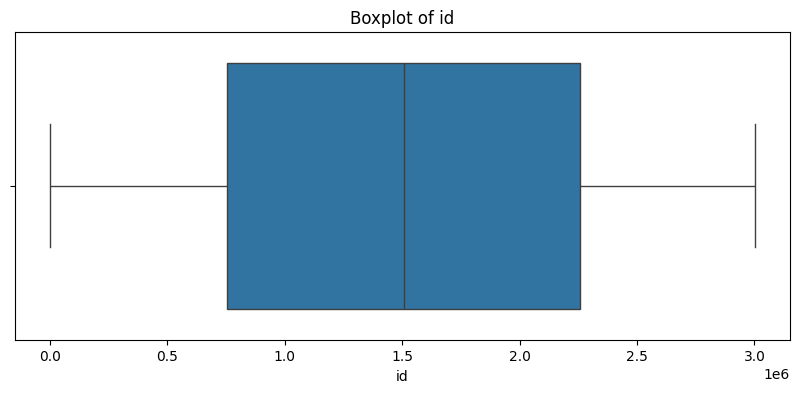

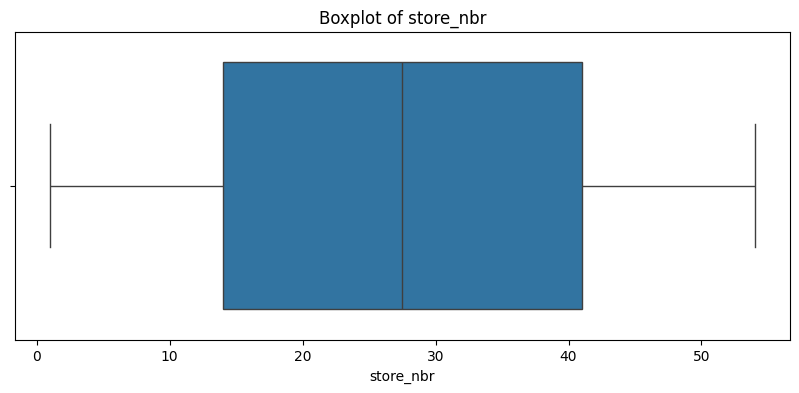

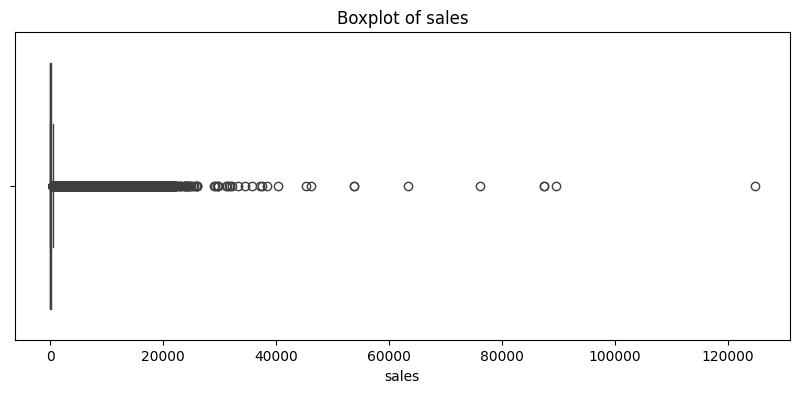

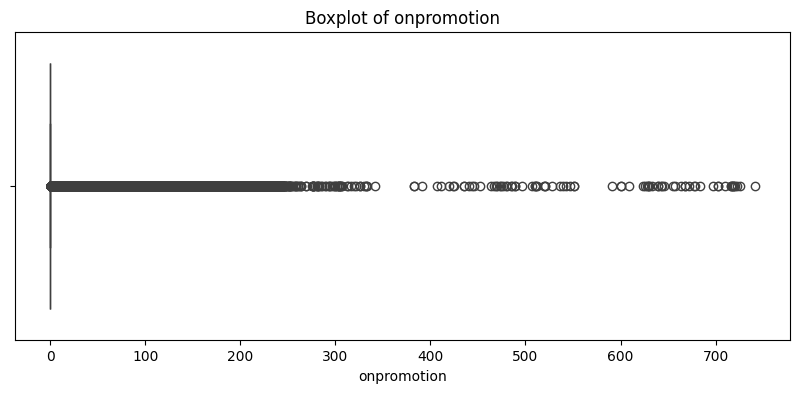

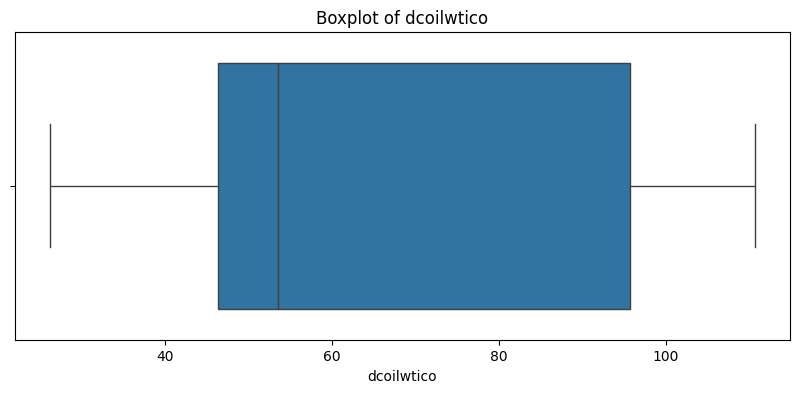

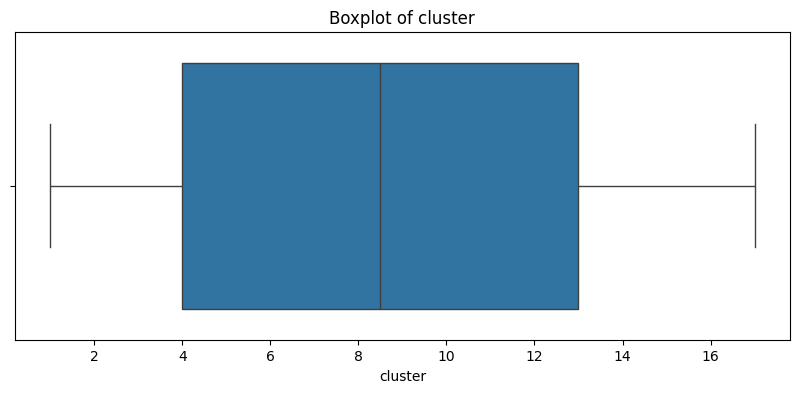

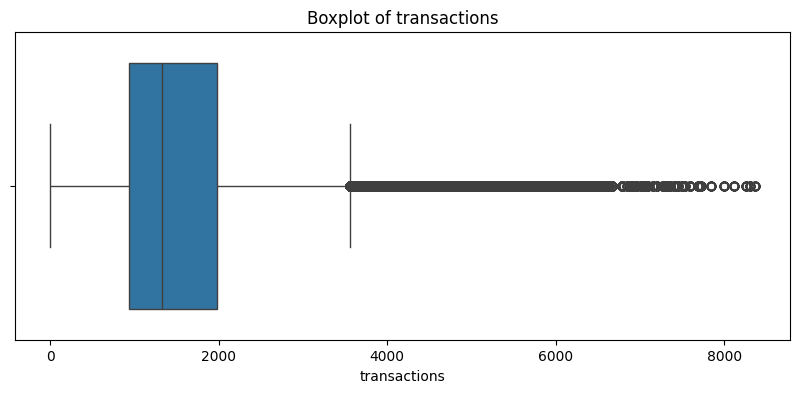

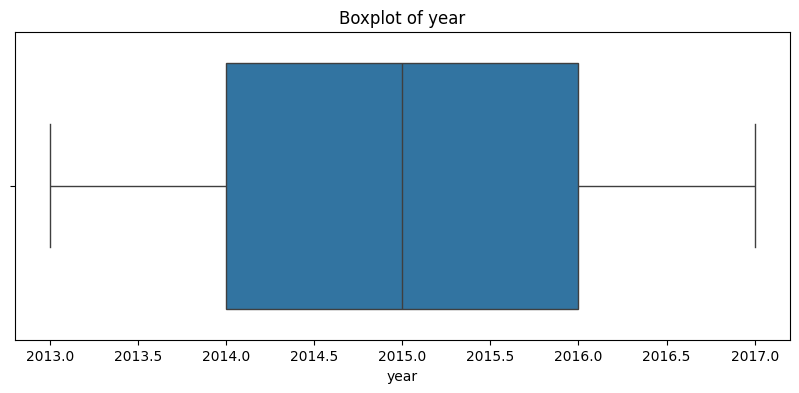

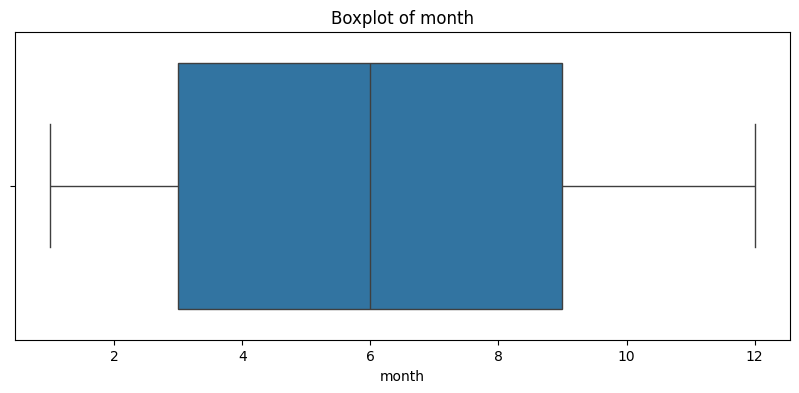

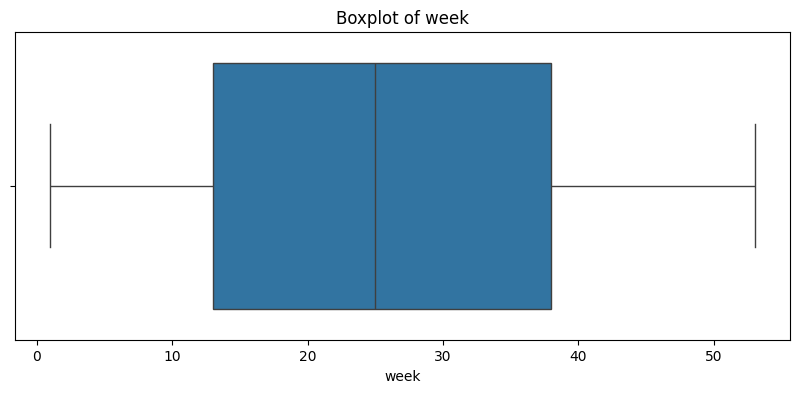

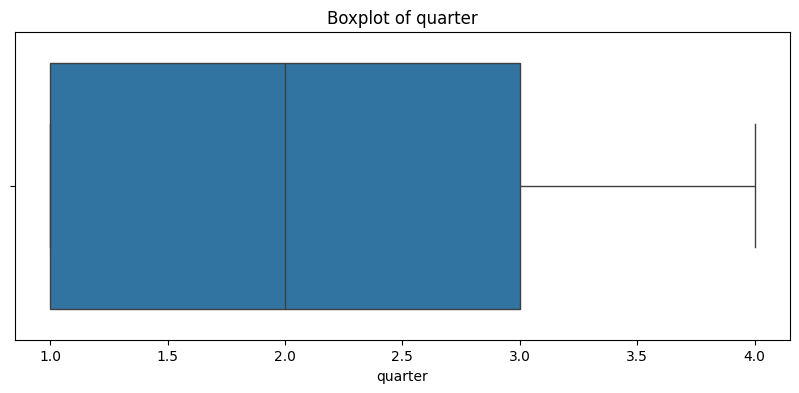

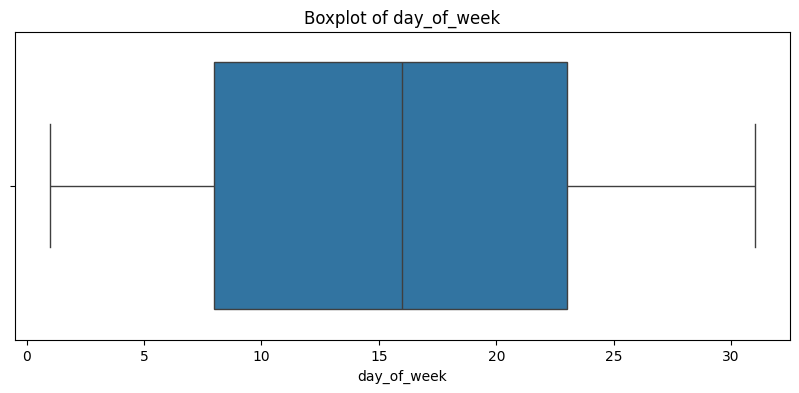

In [23]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [24]:
numeric_cols

Index(['id', 'store_nbr', 'sales', 'onpromotion', 'dcoilwtico', 'cluster',
       'transactions', 'year', 'month', 'week', 'quarter', 'day_of_week'],
      dtype='object')

In [25]:
df[df['sales'] == df.sales.max()]

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week
2194017,2163723,2016-05-02,2,GROCERY I,124717.0,59,Event,National,Ecuador,Terremoto Manabi+16,False,41.67,Quito,Pichincha,D,13,1905.0,2016,5,18,2,2


In [26]:
max_sales_date = df.loc[df['sales'] == df['sales'].max(), 'date'].iloc[0]

start_date = pd.to_datetime(max_sales_date) - pd.DateOffset(days=17)
end_date = pd.to_datetime(max_sales_date) + pd.DateOffset(days=17)

filt = (df['date'] >= start_date) & (df['date'] <= end_date)
df[filt].groupby('date').first().reset_index()

,date,id,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week
0,2016-04-15,2133054,1,AUTOMOTIVE,5.0,0,Normal Day,None,None,None,False,39.74,Quito,Pichincha,D,13,1771.0,2016,4,15,2,15
1,2016-04-16,2134836,1,AUTOMOTIVE,6.0,0,Event,National,Ecuador,Terremoto Manabi,False,39.74,Quito,Pichincha,D,13,1333.0,2016,4,15,2,16
2,2016-04-17,2136618,1,AUTOMOTIVE,1.0,0,Event,National,Ecuador,Terremoto Manabi+1,False,39.74,Quito,Pichincha,D,13,575.0,2016,4,15,2,17
3,2016-04-18,2138400,1,AUTOMOTIVE,14.0,0,Event,National,Ecuador,Terremoto Manabi+2,False,40.46,Quito,Pichincha,D,13,2133.0,2016,4,16,2,18
4,2016-04-19,2140182,1,AUTOMOTIVE,4.0,0,Event,National,Ecuador,Terremoto Manabi+3,False,42.12,Quito,Pichincha,D,13,2079.0,2016,4,16,2,19
5,2016-04-20,2141964,1,AUTOMOTIVE,9.0,0,Event,National,Ecuador,Terremoto Manabi+4,False,41.70,Quito,Pichincha,D,13,2073.0,2016,4,16,2,20
6,2016-04-21,2143746,1,AUTOMOTIVE,4.0,0,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,41.45,Quito,Pichincha,D,13,1852.0,2016,4,16,2,21
7,2016-04-22,2145528,1,AUTOMOTIVE,2.0,0,Event,National,Ecuador,Terremoto Manabi+6,False,40.40,Quito,Pichincha,D,13,1916.0,2016,4,16,2,22
8,2016-04-23,2147310,1,AUTOMOTIVE,3.0,0,Event,National,Ecuador,Terremoto Manabi+7,False,40.40,Quito,Pichincha,D,13,1357.0,2016,4,16,2,23
9,2016-04-24,2149092,1,AUTOMOTIVE,0.0,0,Event,National,Ecuador,Terremoto Manabi+8,False,40.40,Quito,Pichincha,D,13,513.0,2016,4,16,2,24


The sales spike on **2016-05-02** is retained, as it aligns with the aftermath of the April **2016 earthquake** and represents real economic behavior. <br>
So it cannot be **removed or normalized** because of the important information it contains. <br>
But to avoid the random spikes that the model would expect, we will make a new column named `is_crisis` to inform us of the presence of a catastrophe. (whether an earthquake, flood or volcano)

In [27]:
df['is_crisis'] = df['description'].apply(
    lambda x: 1 if isinstance(x, str) and x.startswith('Terremoto Manabi') else 0
)
df['is_crisis'].value_counts()

is_crisis
0    2999106
1      55242
Name: count, dtype: int64

In [28]:
df[df['is_crisis'] == 1].groupby('date').first().reset_index()

,date,id,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week,is_crisis
0,2016-04-16,2134836,1,AUTOMOTIVE,6.0,0,Event,National,Ecuador,Terremoto Manabi,False,39.74,Quito,Pichincha,D,13,1333.0,2016,4,15,2,16,1
1,2016-04-17,2136618,1,AUTOMOTIVE,1.0,0,Event,National,Ecuador,Terremoto Manabi+1,False,39.74,Quito,Pichincha,D,13,575.0,2016,4,15,2,17,1
2,2016-04-18,2138400,1,AUTOMOTIVE,14.0,0,Event,National,Ecuador,Terremoto Manabi+2,False,40.46,Quito,Pichincha,D,13,2133.0,2016,4,16,2,18,1
3,2016-04-19,2140182,1,AUTOMOTIVE,4.0,0,Event,National,Ecuador,Terremoto Manabi+3,False,42.12,Quito,Pichincha,D,13,2079.0,2016,4,16,2,19,1
4,2016-04-20,2141964,1,AUTOMOTIVE,9.0,0,Event,National,Ecuador,Terremoto Manabi+4,False,41.70,Quito,Pichincha,D,13,2073.0,2016,4,16,2,20,1
5,2016-04-21,2143746,1,AUTOMOTIVE,4.0,0,Event,National,Ecuador,Terremoto Manabi+5,False,41.45,Quito,Pichincha,D,13,1852.0,2016,4,16,2,21,1
6,2016-04-22,2145528,1,AUTOMOTIVE,2.0,0,Event,National,Ecuador,Terremoto Manabi+6,False,40.40,Quito,Pichincha,D,13,1916.0,2016,4,16,2,22,1
7,2016-04-23,2147310,1,AUTOMOTIVE,3.0,0,Event,National,Ecuador,Terremoto Manabi+7,False,40.40,Quito,Pichincha,D,13,1357.0,2016,4,16,2,23,1
8,2016-04-24,2149092,1,AUTOMOTIVE,0.0,0,Event,National,Ecuador,Terremoto Manabi+8,False,40.40,Quito,Pichincha,D,13,513.0,2016,4,16,2,24,1
9,2016-04-25,2150874,1,AUTOMOTIVE,12.0,0,Event,National,Ecuador,Terremoto Manabi+9,False,39.74,Quito,Pichincha,D,13,1624.0,2016,4,17,2,25,1


This insures that the model doesn't lose important information while being **robust** to overfitting <br>
### Now for the other 2 columns that contain outliers

In [29]:
df[df['transactions'].max() == df['transactions']].groupby('date').first().reset_index()

,date,id,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week,is_crisis
0,2015-12-23,1932942,44,AUTOMOTIVE,16.0,0,Additional,National,Ecuador,Navidad-2,False,35.55,Quito,Pichincha,A,5,8359.0,2015,12,52,4,23,0


In [30]:
df['transactions'].median()

np.float64(1332.0)

In [31]:
df.nlargest(10, 'onpromotion').groupby('date').first().reset_index()

,date,id,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week,is_crisis
0,2016-05-01,2163162,53,GROCERY I,6712.0,718,Holiday,National,Ecuador,Dia del Trabajo,False,42.76,Manta,Manabi,D,13,1976.0,2016,5,17,2,1,0
1,2016-05-14,2186328,53,GROCERY I,6262.0,717,Event,National,Ecuador,Terremoto Manabi+28,False,44.58,Manta,Manabi,D,13,1967.0,2016,5,19,2,14,1
2,2016-05-15,2188110,53,GROCERY I,6154.0,720,Event,National,Ecuador,Terremoto Manabi+29,False,44.58,Manta,Manabi,D,13,2026.0,2016,5,19,2,15,1
3,2016-05-21,2198802,53,GROCERY I,5800.0,716,Normal Day,None,None,None,False,46.22,Manta,Manabi,D,13,1887.0,2016,5,20,2,21,0
4,2016-05-22,2200584,53,GROCERY I,6044.0,726,Normal Day,None,None,None,False,46.22,Manta,Manabi,D,13,2001.0,2016,5,20,2,22,0
5,2016-05-27,2209494,53,GROCERY I,5601.0,716,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False,47.67,Manta,Manabi,D,13,1798.0,2016,5,21,2,27,0
6,2016-05-28,2211276,53,GROCERY I,5846.0,722,Normal Day,None,None,None,False,47.67,Manta,Manabi,D,13,1883.0,2016,5,21,2,28,0
7,2016-05-29,2213058,53,GROCERY I,6681.0,719,Normal Day,None,None,None,False,47.67,Manta,Manabi,D,13,1839.0,2016,5,21,2,29,0
8,2016-05-31,2216622,53,GROCERY I,7517.0,741,Normal Day,None,None,None,False,48.04,Manta,Manabi,D,13,1950.0,2016,5,22,2,31,0


Most of the outliers are important information that the model can learn from, And by removeing or normalizing them we would lose so much from the data.

In [32]:
df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'holiday_type', 'locale', 'locale_name', 'description', 'transferred',
       'dcoilwtico', 'city', 'state', 'store_type', 'cluster', 'transactions',
       'year', 'month', 'week', 'quarter', 'day_of_week', 'is_crisis'],
      dtype='object')

In [33]:
df.drop(columns=['id', 'locale_name', 'description'], inplace=True)

In [34]:
df.head()

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,transferred,dcoilwtico,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week,is_crisis
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,False,93.14,Quito,Pichincha,D,13,0.0,2013,1,1,1,1,0
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,False,93.14,Quito,Pichincha,D,13,0.0,2013,1,1,1,1,0
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,False,93.14,Quito,Pichincha,D,13,0.0,2013,1,1,1,1,0
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,False,93.14,Quito,Pichincha,D,13,0.0,2013,1,1,1,1,0
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,False,93.14,Quito,Pichincha,D,13,0.0,2013,1,1,1,1,0


In [35]:
df.set_index('date', inplace=True)
df.head()

,store_nbr,family,sales,onpromotion,holiday_type,locale,transferred,dcoilwtico,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week,is_crisis
date,,,,,,,,,,,,,,,,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,False,93.14,Quito,Pichincha,D,13,0.0,2013,1,1,1,1,0
2013-01-01,1,BABY CARE,0.0,0,Holiday,National,False,93.14,Quito,Pichincha,D,13,0.0,2013,1,1,1,1,0
2013-01-01,1,BEAUTY,0.0,0,Holiday,National,False,93.14,Quito,Pichincha,D,13,0.0,2013,1,1,1,1,0
2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,False,93.14,Quito,Pichincha,D,13,0.0,2013,1,1,1,1,0
2013-01-01,1,BOOKS,0.0,0,Holiday,National,False,93.14,Quito,Pichincha,D,13,0.0,2013,1,1,1,1,0


# Feature Engineering

In [36]:
# Lag Feature: Sales 7 days ago
df['sales_lag_7'] = df.groupby(['store_nbr', 'family'])['sales'].shift(7)

# Rolling Mean: Past 7 days
df['rolling_mean_7'] = df.groupby(['store_nbr', 'family'])['sales'].shift(1).rolling(window=7).mean()

# Is Weekend
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# Is Holiday
df['is_holiday'] = df['holiday_type'].notna().astype(int)

# Promotions in Last 7 Days
df['promo_last_7_days'] = df.groupby(['store_nbr', 'family'])['onpromotion'].shift(1).rolling(window=7, min_periods=1).sum()

### Description of New Columns in the Feature Engineering Function

1. **`sales_lag_7`**:
   - **Description**: This column represents the sales from **7 days ago** for each unique combination of `store_nbr` and `family`. It is a lag feature that helps capture the past sales trend for each store and family.
   - **Purpose**: The lag feature provides the model with information about how sales behaved in the past, which can be critical in predicting future sales, especially when sales trends are dependent on previous days.

2. **`rolling_mean_7`**:
   - **Description**: This column is a **7-day rolling mean** of the sales, calculated by taking the average sales for the previous 7 days (excluding the current day) for each combination of `store_nbr` and `family`.
   - **Purpose**: The rolling mean smooths out short-term fluctuations in sales and captures the underlying trend and seasonality over the past week. This helps the model understand if sales are generally increasing, decreasing, or following any cyclical patterns, such as those observed on weekends or during promotions.

3. **`is_weekend`**:
   - **Description**: This binary column indicates whether the day of the week is a **weekend** (Saturday or Sunday). If the `day_of_week` is either 5 (Saturday) or 6 (Sunday), it is marked as `1`; otherwise, it's marked as `0`.
   - **Purpose**: Weekends often have different sales patterns compared to weekdays, so this column helps the model understand the effect of weekends on sales. It allows the model to distinguish between weekday and weekend behavior, which may be important for forecasting.

4. **`is_holiday`**:
   - **Description**: This binary column indicates whether the day is a **holiday** or not, based on the presence of the `holiday_type` column. If `holiday_type` is not missing (i.e., the day is a holiday), it is marked as `1`; otherwise, it is marked as `0`.
   - **Purpose**: Sales on holidays may differ from regular days, so this column helps the model account for the impact of holidays on sales. It adds an important external factor that can influence demand, such as special events or shopping behavior around holidays.

5. **`promo_last_7_days`**:
   - **Description**: This column represents the total number of **promotions in the past 7 days** for each combination of `store_nbr` and `family`. It is a rolling sum of the `onpromotion` column for the last 7 days, considering any ongoing promotions.
   - **Purpose**: Promotions often drive sales, so this column helps the model understand the effect of promotions on sales over the past week. It allows the model to capture the impact of promotional activities in predicting future sales.

---
These new features will help the model capture various temporal and external factors, such as sales trends, seasonality, weekends, holidays, and promotions, which are essential for improving the accuracy of sales predictions.


In [37]:
df.isna().sum()

store_nbr                0
family                   0
sales                    0
onpromotion              0
holiday_type             0
locale                   0
transferred              0
dcoilwtico               0
city                     0
state                    0
store_type               0
cluster                  0
transactions             0
year                     0
month                    0
week                     0
quarter                  0
day_of_week              0
is_crisis                0
sales_lag_7          12474
rolling_mean_7        1788
is_weekend               0
is_holiday               0
promo_last_7_days     1782
dtype: int64

In [38]:
df[df['sales_lag_7'].isna()].groupby('date').first().reset_index()

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,transferred,dcoilwtico,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week,is_crisis,sales_lag_7,rolling_mean_7,is_weekend,is_holiday,promo_last_7_days
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,False,93.14,Quito,Pichincha,D,13,0.0,2013,1,1,1,1,0,NaN,NaN,0,1,NaN
1,2013-01-02,1,AUTOMOTIVE,2.0,0,Normal Day,None,False,93.14,Quito,Pichincha,D,13,2111.0,2013,1,1,1,2,0,NaN,0.000000,0,1,0.0
2,2013-01-03,1,AUTOMOTIVE,3.0,0,Normal Day,None,False,93.14,Quito,Pichincha,D,13,1833.0,2013,1,1,1,3,0,NaN,0.285714,0,1,0.0
3,2013-01-04,1,AUTOMOTIVE,3.0,0,Normal Day,None,False,93.14,Quito,Pichincha,D,13,1863.0,2013,1,1,1,4,0,NaN,109.500857,0,1,0.0
4,2013-01-05,1,AUTOMOTIVE,5.0,0,Work Day,National,False,93.14,Quito,Pichincha,D,13,1509.0,2013,1,1,1,5,0,NaN,86.213714,1,1,0.0
5,2013-01-06,1,AUTOMOTIVE,2.0,0,Normal Day,None,False,93.14,Quito,Pichincha,D,13,520.0,2013,1,1,1,6,0,NaN,57.953143,1,1,0.0
6,2013-01-07,1,AUTOMOTIVE,0.0,0,Normal Day,None,False,93.14,Quito,Pichincha,D,13,1807.0,2013,1,2,1,7,0,NaN,89.325714,0,1,0.0


In [39]:
df['sales_lag_7'].fillna(method='bfill', inplace=True)

The first week is messing because there are no previous week to calculate the lag of it

In [40]:
df[df['rolling_mean_7'].isna()].groupby('date').first().reset_index()

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,transferred,dcoilwtico,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week,is_crisis,sales_lag_7,rolling_mean_7,is_weekend,is_holiday,promo_last_7_days
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,False,93.14,Quito,Pichincha,D,13,0.0,2013,1,1,1,1,0,0.0,NaN,0,1,NaN
1,2013-01-02,1,AUTOMOTIVE,2.0,0,Normal Day,None,False,93.14,Quito,Pichincha,D,13,2111.0,2013,1,1,1,2,0,0.0,NaN,0,1,0.0


In [41]:
df['rolling_mean_7'].fillna(method='bfill', inplace=True)

The first 2 days are missing because there are no sales on those days

In [42]:
df[df['promo_last_7_days'].isna()].groupby('date').first().reset_index()

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,transferred,dcoilwtico,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week,is_crisis,sales_lag_7,rolling_mean_7,is_weekend,is_holiday,promo_last_7_days
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,False,93.14,Quito,Pichincha,D,13,0.0,2013,1,1,1,1,0,0.0,0.0,0,1,NaN


In [43]:
df['promo_last_7_days'].fillna(method='bfill', inplace=True)

The 1st day has missing values because there are no promotions were on that day

In [44]:
df.isna().sum()

store_nbr            0
family               0
sales                0
onpromotion          0
holiday_type         0
locale               0
transferred          0
dcoilwtico           0
city                 0
state                0
store_type           0
cluster              0
transactions         0
year                 0
month                0
week                 0
quarter              0
day_of_week          0
is_crisis            0
sales_lag_7          0
rolling_mean_7       0
is_weekend           0
is_holiday           0
promo_last_7_days    0
dtype: int64

In [45]:
df.groupby('date').first().reset_index().head(10)

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,transferred,dcoilwtico,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week,is_crisis,sales_lag_7,rolling_mean_7,is_weekend,is_holiday,promo_last_7_days
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,False,93.14,Quito,Pichincha,D,13,0.0,2013,1,1,1,1,0,0.0,0.000000,0,1,0.0
1,2013-01-02,1,AUTOMOTIVE,2.0,0,Normal Day,None,False,93.14,Quito,Pichincha,D,13,2111.0,2013,1,1,1,2,0,0.0,0.000000,0,1,0.0
2,2013-01-03,1,AUTOMOTIVE,3.0,0,Normal Day,None,False,93.14,Quito,Pichincha,D,13,1833.0,2013,1,1,1,3,0,0.0,0.285714,0,1,0.0
3,2013-01-04,1,AUTOMOTIVE,3.0,0,Normal Day,None,False,93.14,Quito,Pichincha,D,13,1863.0,2013,1,1,1,4,0,0.0,109.500857,0,1,0.0
4,2013-01-05,1,AUTOMOTIVE,5.0,0,Work Day,National,False,93.14,Quito,Pichincha,D,13,1509.0,2013,1,1,1,5,0,0.0,86.213714,1,1,0.0
5,2013-01-06,1,AUTOMOTIVE,2.0,0,Normal Day,None,False,93.14,Quito,Pichincha,D,13,520.0,2013,1,1,1,6,0,0.0,57.953143,1,1,0.0
6,2013-01-07,1,AUTOMOTIVE,0.0,0,Normal Day,None,False,93.14,Quito,Pichincha,D,13,1807.0,2013,1,2,1,7,0,0.0,89.325714,0,1,0.0
7,2013-01-08,1,AUTOMOTIVE,2.0,0,Normal Day,None,False,93.14,Quito,Pichincha,D,13,1869.0,2013,1,2,1,8,0,0.0,103.256714,0,1,0.0
8,2013-01-09,1,AUTOMOTIVE,2.0,0,Normal Day,None,False,93.14,Quito,Pichincha,D,13,1910.0,2013,1,2,1,9,0,2.0,69.503714,0,1,0.0
9,2013-01-10,1,AUTOMOTIVE,2.0,0,Normal Day,None,False,92.97,Quito,Pichincha,D,13,1679.0,2013,1,2,1,10,0,3.0,60.764426,0,1,0.0


After completing the advanced data analysis and visualizations, we will drop the following columns due to irrelevance or redundancy:

- **`city`**: Too granular — the same information is already captured by `state` or `cluster`.
- **`locale`**: Redundant with `locale_name` and `holiday_type`.
- **`cluster`**: Often overlaps with `state` and `store_type`. Will be dropped unless proven useful during modeling.